## Group 15 - Contraceptive method used among Indonesian women

Kenna Roozendaal, Joy Cai, Naura Ambareswari

#### Introduction

Indonesia experienced a notable decline in its fertility rates between 1984 and 1987. The increased use of contraceptives is a significant factor in the drop in fertility due to more women gaining access to and awareness of available family planning resources compared to previous years. To better understand and address the declining fertility trend, the National Indonesia Contraceptive Prevalence Survey conducted a survey on family planning as well as collected women’s sociodemographic background.

The data taken from the survey will be used to answer the question *“Given the wife's age, religion, and standard of living, what is the preferred contraceptive method used?”*. We will be using the Contraceptive Method Choice Data Set that sampled married women in Indonesia who were not pregnant or were unaware they were pregnant (Lim, 1997). The goal was to predict women’s contraceptive method of choice (no use, long-term methods, short-term methods) based on characteristics like age, religion, standard of living, education, etc.

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice 

#### Methods

First, the dataset will need to be filtered in order to only get the columns that are relvant to answering the question. Since there are no headers provided with the dataset, they will need to be manually set. The columns used from the dataset are wife’s age, religion, education, standard of living, and contraceptive method used. Religion was chosen as a predictor because it influences the type of contraceptive used and Indonesia holds the largest Muslim population (Hefner, 2020; Hill et al., 2014). Education and age are predictors because age, socioeconomic level, and level of education, particularly educational lag, have been found to impact women’s contraceptive methods (Sámano et al., 2019). 

RELEVANT COLUMNS:
- Wife's age
- Wife's education level (1=low 2,3,4=high)
- Wife's religion (0=not Islam 1=Islam)
- Standard of living (1=low 2,3,4=high)
- Contraceptive method used (1= no use 2=long-term 3=short-term)

Aftering filtering the dataset, will be read into Python and the data will be split into a training and testing set, 75% for the training set and 25% for the testing set. This will allow us to evaluate the accuracy of our model for predicting the prefered method of contraception. To create the most accurate predictor, the model will be tuned by testing different k-values for k-nearest neighbors. As such, a standard <code>5-fold-cross-validation</code> will be conducted using the GridSearchCV method from the scikit-learn package. Using the best value for k, the model with maximized efficiency can be used.

Using the tuned model, we will be able to predict the method of contraception used given information about the wife using the <code>predict</code> method. 


#### Expected outcomes and significance

Women with a higher standard of living and higher education level tend to use contraceptives longer than other groups because they are more aware of the available family planning resources and other resources beyond what the government offers. Alternately, women with lower education levels and a lower standard of living are more likely to use contraceptives for a shorter period or not use them at all (Iseyemi et al., 2017). 

Predicting women’s contraceptive choice can help healthcare providers and policymakers ensure proper access to their preferred contraception. Identifying sociodemographic groups that use or do not use contraceptives can assess disparities in access, utilization, and education of contraception. Despite Indonesia’s decline in fertility, contraceptive use can lower rates of unplanned pregnancies as well as maternal and infant mortality. 
This research can further inquire on the accessibility of contraception and family planning for all sociodemographic groups in Indonesia, and how it can be improved in order to ensure equality and promote autonomy and control over women’s reproductive health. 


#### Preliminary exploratory data analysis

We first want to load the csv file into a dataframe so that we can better visualize the data. Appropriate headers are added and only the columns that have variables that are not related to the question are removed.

In [57]:
import altair as alt
import numpy as np
import pandas as pd
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

alt.data_transformers.disable_max_rows()
alt.renderers.enable("mimetype")

np.random.seed(123)


In [55]:
cmc_dataset = pd.read_csv("data/cmc.data.csv", header=None,
                     names=[
                         "wife_age", 
                         "wife_education", #1=low 2,3,4=high
                         "husband_education", #1=low 2,3,4=high
                         "num_children_born",
                         "wife_religion", #0=not Islam 1=Islam
                         "wife_working", #0=yes 1=no
                         "husband_occupation", #1,2,3,4 (categorical)
                         "standard_of_living_index", #1=low 2,3,4=high
                         "media_exposure", #0=good 1=not good
                         "contraceptive_method_used", #1= no use 2=long-term 3=short-term
                     ]
                     )
cmc_dataset

,wife_age,wife_education,husband_education,num_children_born,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [56]:
cmc_dataset_filtered = cmc_dataset.loc[:, ["wife_age", "wife_education","wife_religion","standard_of_living_index", "contraceptive_method_used"]]
cmc_dataset_filtered

,wife_age,wife_education,wife_religion,standard_of_living_index,contraceptive_method_used
0,24,2,1,3,1
1,45,1,1,4,1
2,43,2,1,4,1
3,42,3,1,3,1
4,36,3,1,2,1
...,...,...,...,...,...
1468,33,4,1,4,3
1469,33,4,1,4,3
1470,39,3,1,4,3
1471,33,3,1,2,3


Now we want to split our data into a training and testing set. The preliminary data analysis will be an exploratory analysis that uses data from the training set only. In order to reduce human bias, only the training set will be visualized. For this project, the dataset will be split 75% training and 25% testing. Stratify was used to maintain the distribution. 

In [58]:
cmc_train, cmc_test = train_test_split(cmc_dataset_filtered, test_size=0.25, stratify = cmc_dataset_filtered["contraceptive_method_used"])
cmc_train.head()

,wife_age,wife_education,wife_religion,standard_of_living_index,contraceptive_method_used
823,30,3,1,1,3
567,34,3,0,3,2
388,28,2,1,4,1
337,30,4,1,4,1
331,35,1,1,4,1


In our preliminary analysis, we want to be able to summarize useful information about the training set in a table. As such, we want to be able to see if there is any missing data, and the means and medians of our predictor variables. 

In [33]:
missing_data = cmc_train.isna().sum()
missing_data

wife_age                     0
wife_education               0
wife_religion                0
standard_of_living_index     0
contraceptive_method_used    0
dtype: int64

There is no missing data in our dataset, thus we do not need to filter out any incomplete rows.

In [34]:
variable_agg = cmc_train.agg(["mean", "median", "max", "min"])
variable_agg

,wife_age,wife_education,wife_religion,standard_of_living_index,contraceptive_method_used
mean,32.627717,2.958333,0.848732,3.123188,1.92029
median,32.000000,3.000000,1.000000,3.000000,2.00000
max,49.000000,4.000000,1.000000,4.000000,3.00000
min,16.000000,1.000000,0.000000,1.000000,1.00000


From the table above, we are able to obtain information about the distribution of the data in the training set. The mean and median gives an idea of the distribution of the data and which groups are dominant for each predictor. Using the min and max, we can confirm that observations spanning the entire range of the dataset are included. 

**Visualization**

We chose our predictors based on academic papers that have found a correlation between each variable and the method of contraception used. As such we want to be able to see if each variable demonstrates a clear correlation. 

**Wife's age**

In [35]:
wife_age_correlation = alt.Chart(cmc_train, title = "Age vs. Method of Contraception Used").mark_point().encode(
    x = alt.X("wife_age", title = "Wife's age (years)"),
    y = alt.Y("count()", title = "Number of records"),
).facet("contraceptive_method_used")
wife_age_correlation

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


There does not seem to be a clear correlation between age and no method of contraception used. However, for short-term and long-term contraception, we can clearly see a peak at around 35 and 30 years old respectively. 

**Wife's education**

In [36]:
wife_education_correlation = alt.Chart(cmc_train, title = "Distribution of Education For Each Method of Contraception Used").mark_bar(size=10).encode(
    x = alt.X("contraceptive_method_used", title = "Contraceptive method used"),
    y = alt.Y("count()", title = "Number of records"),
    color = alt.Color("wife_education",legend=alt.Legend(title="Education level"))
).properties(width=100)
wife_education_correlation

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


From the graph, we can see that as the level of education increases, there is a greater proportion of of women who chose to use contraceptives. 

**Standard of living**

In [37]:
living_standard_correlation = alt.Chart(cmc_train, title = "Distribution of Standard of Living For Each Method of Contraception Used").mark_bar(size=10).encode(
    x = alt.X("contraceptive_method_used", title = "Contraceptive method used"),
    y = alt.Y("count()", title = "Number of records"),
    color = alt.Color("standard_of_living_index", legend=alt.Legend(title="Standard of living index"))
).properties(width=100)
living_standard_correlation

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


For individuals who have a standard of living of 1-3, it can clearly be seen that the proportion that use contraceptions decreases significantly for short-term (2) and long-term (3) methods. In addition, a larger percentage of the bars for 2 and 3 are taken up by individuals with a very high standard of living (4), meaning that there is a greater proportion that use contraceptives. 

**Religion**

In [38]:
wife_religion_correlation = alt.Chart(cmc_train, title = "Distribution of Religion For Each Method of Contraception Used").mark_bar(size=10).encode(
    x = alt.X("contraceptive_method_used", title = "Contraceptive method used"),
    y = alt.Y("count()", title = "Number of records"),
    color = alt.Color("wife_religion", legend=alt.Legend(title="Religion"))
).properties(width=100)
wife_religion_correlation

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


From the graph, we can see that the greater number of women surveyed were religious and used no method of contraception. However, when focusing on the invididual bars, the distribution of religion and non-religious women for each method of contraception does not differ greatly. 

#### Data Analysis

Using the same training and testing set that was created in the preliminary analysis. We can begin to train a K-neighbours classifier to predict the method of contraceptive method used. First, we will create a pipeline with a scaler and KNeighboursClassifier. 

In [39]:
#make preprocessor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
     (StandardScaler(), ["wife_age", "wife_education", "wife_religion", "standard_of_living_index"]),
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['wife_age', 'wife_education', 'wife_religion',
                                  'standard_of_living_index'])])

In [40]:
#choosing K
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
X = cmc_train.loc[:, ["wife_age", "wife_education", "wife_religion", "standard_of_living_index"]]
y = cmc_train["contraceptive_method_used"]


In [41]:
#make pipeline
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(preprocessor, knn)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['wife_age', 'wife_education',
                                                   'wife_religion',
                                                   'standard_of_living_index'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [42]:
#specify grid of parameter values
pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    ['wife_age', 'wife_education', 'wife_religion',
                                     'standard_of_living_index'])])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  ['wife_age', 'wife_education', 'wife_religion',
                                   'standard_of_living_index'])]),
 'kneighborsclassifier': KNeighborsClassifier(),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('standardscaler',
   StandardScaler(),
   ['wife_age',
    'wife_education',
    'wife_religion',
    'standard_of_living_index'])],
 'columntransformer__

Using the parameters provided above, appropriate values were chosen for the parameter grid for the <code>GridSearchCV</code> method. As such, we are able to find the k-value that provides the most accurate predictions. 

In [43]:
#make parameter grid
param_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 100, 5),
}
param_grid

{'kneighborsclassifier__n_neighbors': range(1, 100, 5)}

In [44]:
#create GridSearchCV object
from sklearn.model_selection import GridSearchCV

cmc_tune_grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5
)
cmc_tune_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['wife_age',
                                                                          'wife_education',
                                                                          'wife_religion',
                                                                          'standard_of_living_index'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 100, 5)})

In [45]:
#use fit to begin tuning process
accuracies_grid = pd.DataFrame(
    cmc_tune_grid
    .fit(cmc_train.loc[:, ["wife_age", "wife_education", "wife_religion", "standard_of_living_index"]],
         cmc_train["contraceptive_method_used"]
        ).cv_results_)
accuracies_grid.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009770,0.008484,0.010007,0.001294,1,{'kneighborsclassifier__n_neighbors': 1},0.416290,0.393665,0.420814,0.452489,0.381818,0.413015,0.024402,20
1,0.004093,0.000208,0.009239,0.000149,6,{'kneighborsclassifier__n_neighbors': 6},0.447964,0.438914,0.488688,0.461538,0.418182,0.451057,0.023511,15
2,0.004094,0.000293,0.009500,0.000128,11,{'kneighborsclassifier__n_neighbors': 11},0.438914,0.420814,0.479638,0.470588,0.427273,0.447445,0.023498,16
3,0.003955,0.000407,0.009091,0.000575,16,{'kneighborsclassifier__n_neighbors': 16},0.434389,0.375566,0.488688,0.520362,0.450000,0.453801,0.049314,14
4,0.003496,0.000074,0.008959,0.000136,21,{'kneighborsclassifier__n_neighbors': 21},0.429864,0.398190,0.452489,0.493213,0.440909,0.442933,0.030972,17
5,0.003836,0.000327,0.009437,0.000282,26,{'kneighborsclassifier__n_neighbors': 26},0.434389,0.402715,0.420814,0.443439,0.450000,0.430271,0.016902,19
6,0.003945,0.000190,0.010038,0.000473,31,{'kneighborsclassifier__n_neighbors': 31},0.429864,0.407240,0.475113,0.443439,0.450000,0.441131,0.022425,18
7,0.003564,0.000138,0.009722,0.000064,36,{'kneighborsclassifier__n_neighbors': 36},0.466063,0.411765,0.488688,0.452489,0.477273,0.459255,0.026602,13
8,0.003547,0.000041,0.009960,0.000163,41,{'kneighborsclassifier__n_neighbors': 41},0.470588,0.425339,0.479638,0.461538,0.477273,0.462875,0.019791,10
9,0.003633,0.000110,0.010210,0.000173,46,{'kneighborsclassifier__n_neighbors': 46},0.452489,0.438914,0.493213,0.484163,0.445455,0.462847,0.021721,11


In [46]:
#use a graph to determine the K value with the highest accuracy
accuracy_vs_k = (
    alt.Chart(accuracies_grid)
    .mark_line(point=True)
    .encode(
        x=alt.X("param_kneighborsclassifier__n_neighbors", title="Neighbors",
               ),
        y=alt.Y("mean_test_score",
                title="Accuracy Estimate",
               scale=alt.Scale(domain=(0.40, 0.50)),
    )
    ))
accuracy_vs_k

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


To better visualize the relevant data from the <code>accuracies_grid</code> dataset, we plotted the k-nearest-neighbours against the average test score in a line plot. From the graph, it can be observed that the highest accuracy occurs at a value of <code>k = 65</code>, with a mean score of around 0.486. As such, this would be the optimal k-value of the model to provide the most accurate predictions on new data.

In [47]:
#choose K value of 65
knn = KNeighborsClassifier(n_neighbors=65)
X = cmc_test.loc[:, ["wife_age", "wife_education", "wife_religion", "standard_of_living_index"]]
y = cmc_test["contraceptive_method_used"]

In [48]:
#make pipeline
knn_fit = make_pipeline(preprocessor, knn).fit(X, y)
knn_fit

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['wife_age', 'wife_education',
                                                   'wife_religion',
                                                   'standard_of_living_index'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=65))])

In [49]:
#make predictions using test set
cmc_test_predictions = cmc_test.assign(
    predicted = knn_fit.predict(X))
cmc_test_predictions

,wife_age,wife_education,wife_religion,standard_of_living_index,contraceptive_method_used,predicted
1100,24,4,1,3,1,3
208,32,4,1,4,1,3
1179,23,3,1,2,1,3
1384,36,4,1,4,3,3
46,32,4,1,3,1,3
...,...,...,...,...,...,...
58,21,2,1,4,1,1
99,27,2,1,1,1,1
1174,18,3,1,1,1,1
1451,37,2,1,3,3,1


In [50]:
#compute accuracy by checking number of correct/incorrect predictions
correct_preds = cmc_test_predictions[
    cmc_test_predictions["contraceptive_method_used"] == cmc_test_predictions["predicted"]
]
correct_preds

,wife_age,wife_education,wife_religion,standard_of_living_index,contraceptive_method_used,predicted
1384,36,4,1,4,3,3
612,37,4,0,4,2,2
429,38,4,0,2,2,2
1279,39,4,0,4,2,2
548,41,4,1,4,2,2
...,...,...,...,...,...,...
869,28,3,1,4,3,3
158,45,1,1,2,1,1
58,21,2,1,4,1,1
99,27,2,1,1,1,1


In [51]:
prediction_accuracy = (167/369)*100
prediction_accuracy

45.25745257452575

Using the classifier trained using the training set of <code>cmc.data.csv</code>, the prediction accuracy on the testing set is around 45.26%. 


To better visualize the results of the classification, a confusion matrix can be used to grasp a better idea of the predicted values compared to the actual values. 

In [63]:
cmc_mat = confusion_matrix(
    cmc_test_predictions["contraceptive_method_used"],  # true labels
    cmc_test_predictions["predicted"],  # predicted labels
    labels=knn_fit.classes_, # specify the label for each class
)
cmc_mat

array([[98, 13, 47],
       [24, 29, 30],
       [46, 16, 66]])

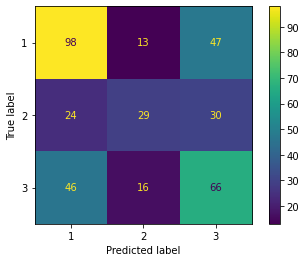

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=cmc_mat, display_labels=knn_fit.classes_
)
disp.plot()

From the confusion matrix, we are able to observe the number of correct and incorrect labels, which can help us better understand the accuracy of our classifier when discussion the results of this analysis. 

#### Discussion

This research explored the contraceptive method used among Indonesian women using a dataset from the ​​National Indonesia Contraceptive Prevalence Survey. Our initial exploratory analysis found no clear correlation between a woman's age and the use of contraception, but the proportion of women using short-term contraception peaked at around 30 years old, while those using long-term contraception peaked at around 35 years old. Additionally, education level and standard of living were found to be positively correlated with the use of contraception. Religion also played a role, as the majority of religious women did not use any method of contraception.


These findings were consistent with our expectations. Younger women have been found to prefer a shorter duration of contraception, while older women were more likely to use it for longer periods (Wellings et al., 2013). Women with a higher standard of living and higher education level tend to use contraceptives longer than other groups because they are more aware of the available family planning resources and other resources beyond what the government offers. Alternatively, women with lower education levels and a lower standard of living are more likely to use contraceptives for a shorter period or not use them at all (Iseyemi et al., 2017). Lastly, Islamic beliefs can influence women’s view of contraception as some Muslim women viewed using contraceptives as a violation of Islamic teachings on procreation (Obasohan, 2014). 

However, after using the same variables to create a classifier to predict the method of contraception used, the results were different than what we predicted. The final accuracy of our model when predicting new data is around 45.26%, much less than the expected value. This indicates that there are factors that are causing our model to fail. 

**Analysis of Model Failure**

Although there are many strengths of the KNN Classification, no model is perfect for all types of data. Hence, we need to analyze possible cases that resulted in our model failing. We can already eliminate cases such as missing data and uneven distribution of classes within testing and training datasets since they were already acknowledged and prevented in our preliminary analysis. 


<u>Case 1: Data is randomly spread (no correlation)</u>

A possible reason is that there is no correlation between the predictor variables and predicted class, which results in inaccurate results since the n-nearest neighbors are just a mix of all classes with no clear majority. In our preliminary data analysis, we explored the relationships between each variable and the predicted class. All of them except for religion should have a relatively clear correlation, so a possibility may be that the religion class is affecting the ability for our model to predict classes. After trying the classification again without the religion class, we saw no observable increase in our model’s accuracy, which means that besides correlation, there may be other factors that are making our model fail. 
However, after analyzing the confusion matrix based on the predictions made on the testing dataset, it can be seen that the inaccuracy of the model is consistent throughout every type of contraceptive method. This indicates that the points are too messy for the KNN algorithm to find a clear majority when picking the k closest values. As such, the correlation of our predictor variables to the class we are trying predict may all be too weak for this algorithm to work effectively. 
Another hint that supports this case is that the number of neighbors doesn’t seem to drastically change the accuracy of the model. From the line graph of accuracy vs k created in the analysis section, it can be seen that the accuracy of the model stays within a small range of 40-50% for all k-values from 1 to 100. For a successful model, there is generally a clear indication for k-values that results in overfitting/underfitting, but there are no significant drops or raises for our model. This can be an indication that our data is very scattered with no strong correlation, making it difficult to predict using KNN no matter how neighbors are taken into account. In addition, for a dataset of only 1473 rows, requiring a k-value of 65 is already an indication that KNN may not be the most effective method of classification.  

<u>Case 2: There are too many outliers </u>

The KNN algorithm is very sensitive to outliers as it classifies all inputs even if they are far away data points with no similarities, thus decreasing the accuracy of the classifier when predicting on unseen data. However, from the exploratory analysis, there were no clear outliers within the graphical visualizations. In addition, the accuracy score of the model when predicting testing and training data were the same, meaning that the presence of outliers does not seem to be the main reason for the failing model. 

<u>Case 3: Data is imbalanced</u>

Another possible case that the dataset is imbalance, where there are classes that are in a clear majority compared to other ones. If this were the case, we would have to downsample the majority classes and upweight the minority classes in order to balance them out as KNN is very sensitive to unbalanced data. However, after reevaluating the data from the exploratory analysis, the classes all seem generally balanced with no clear majority. Although some classes are bigger than others, the difference is not great enough to result in a failing model without the influence of other factors. 


**Implications**

Although it is not recommended for policymakers to use this report as the sole foundation for policy changes, our findings provide insight into the use of contraception among Indonesian women. Due to the decreased reliability of our model, further research needs to be conducted to have a better understanding of the relationship between variables. The results suggest that efforts to improve women’s education and economic empowerment could lead to increased access to contraception and more effective family planning practices in Indonesia. The social and economic disparities propose policymakers ensure education and access to preferred contraception are readily available to all sociodemographic groups, including those in lower social and educational levels. Despite Indonesia’s decline in fertility, contraceptive use can lower rates of unplanned pregnancies and maternal and infant mortality. 

**Further Discussion**

If we want to improve our model for further analysis, other methods of classification need to be considered. Another method that <code>sklearn</code> offers is logistic regression, that estimates the probability of an event occurring based on a given dataset of independent variables. Instead of finding neighbors, using logistic regression to look for boundaries between classes may be a better fit for how our data is spread out. However, it is also possible that the research question requires a much more advanced classification model outside the scope of this course in order to build a classifier that makes accurate predictions. Overall, further analysis with different algorithms is required in order to create a classifier that can be reliable if used on new data outside of the current dataset. 

Future studies should include a more comprehensive dataset and explore additional factors that may influence Indonesian women’s preferred contraceptive method. This includes cultural and religious norms from different parts of Indonesia, accessibility of contraceptive methods, and social attitudes toward family planning. Addressing the barriers to access to contraception can ensure social equality and promote autonomy and control over women’s reproductive health.


#### References

Hefner, R. W. (2020). Islam and covenantal pluralism in Indonesia: A critical juncture analysis. The Review of Faith & International Affairs, 18(2), 1-17.

Hill, N. J., Siwatu, M., & Robinson, A. K. (2014). “My religion picked my birth control”: The influence of religion on contraceptive use. Journal of religion and health, 53, 825-833.

Iseyemi, A., Zhao, Q., McNicholas, C., & Peipert, J. F. (2017). Socioeconomic status as a risk factor for unintended pregnancy in the contraceptive CHOICE project. Obstetrics and gynecology, 130(3), 609.

Lim, T. (1997). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Obasohan, P. (2014). Religion, ethnicity and contraceptive use among reproductive age women in Nigeria. International Journal of MCH and AIDS (IJMA), 3(1). https://doi.org/10.21106/ijma.39 

Sámano, R., Martínez-Rojano, H., Chico-Barba, G., Sánchez-Jiménez, B., Sam-Soto, S., Rodríguez-Ventura, A. L., ... & Sclavo-Melo, S. (2019). Sociodemographic factors associated with the knowledge and use of birth control methods in adolescents before and after pregnancy. International journal of environmental research and public health, 16(6), 1022.

Wellings, K., Jones, K. G., Mercer, C. H., Tanton, C., Clifton, S., Datta, J., Copas, A. J., Erens, B., Gibson, L. J., Macdowall, W., Sonnenberg, P., Phelps, A., &amp; Johnson, A. M. (2013). The prevalence of unplanned pregnancy and associated factors in Britain: Findings from the Third National Survey of Sexual Attitudes and lifestyles (NATSAL-3). The Lancet, 382(9907), 1807–1816. https://doi.org/10.1016/s0140-6736(13)62071-1 
